<a href="https://colab.research.google.com/github/Ravi-7077/Valorant_agent_detector/blob/main/valorant_agent_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
random.seed(11)
import numpy as np
np.random.seed(11)
import tensorflow as tf
tf.random.set_seed(11)

In [ ]:
import os
import shutil
import json
from zipfile import ZipFile
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mp
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers ,models

In [ ]:
kagg_info=json.load(open('/content/kaggle.json'))

In [ ]:
os.environ['KAGGLE_USERNAME'] = kagg_info['username']
os.environ['KAGGLE_KEY'] = kagg_info['key']

In [ ]:

!kaggle datasets download rushilverma07/valorant-image-dataset-structured-collection

Dataset URL: https://www.kaggle.com/datasets/rushilverma07/valorant-image-dataset-structured-collection
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
 76% 142M/186M [00:00<00:00, 648MB/s] 
100% 186M/186M [00:00<00:00, 556MB/s]


In [ ]:
!ls

astra.zip  catagorical.zip


In [ ]:
os.makedirs('/content/catagorical.zip')

In [ ]:
with ZipFile('/astra (2).zip') as zip_ref:
  zip_ref.extractall()


In [ ]:
print(len(os.listdir('/content')))

27


In [ ]:
base='/content'

(430, 474, 3)
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


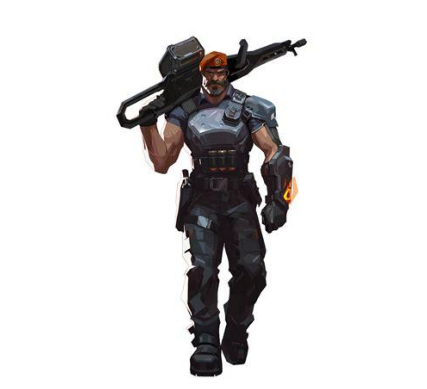

In [ ]:
img_path='/content/valorant_images/valorant_images/valorant_Brimstone Valorant_4.jpg'
img=mp.imread(img_path)
print(img.shape)
plt.imshow(img)
plt.axis('off')
print(img)

In [ ]:
img_size=255
batch_size=24

In [ ]:
data_gen=ImageDataGenerator(
    rescale=1/255,
    validation_split=.2
)

In [ ]:
newbase_dir = '/content/unsupervised_images'
os.makedirs(newbase_dir,exist_ok=True)

In [ ]:
for filename in os.listdir(base):
  if filename.endswith(('.png','.jpg','.jpeg')):
    shutil.move(os.path.join(base,filename),os.path.join(newbase_dir,filename))


print(len(os.listdir('/content/unsupervised_images')))

FileNotFoundError: [Errno 2] No such file or directory: '/content/unsupervised_images'

In [ ]:

train_gen=data_gen.flow_from_directory(
    base,
    batch_size=batch_size,
    target_size=(img_size,img_size),
    subset='training',
    class_mode='categorical',

)

Found 2040 images belonging to 27 classes.


In [ ]:
validation_gen=data_gen.flow_from_directory(
    base,
    batch_size=batch_size,
    target_size=(img_size,img_size),
    subset='validation',
    class_mode='categorical'
)

Found 510 images belonging to 27 classes.


In [ ]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(img_size,img_size,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(train_gen.num_classes,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 253, 253, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 124, 124, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    29,491,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 27)             │         6,939 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,591,643 (112.88 MB)

 Trainable params: 29,591,643 (112.88 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='nadam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
training=model.fit(
    train_gen,
    steps_per_epoch=train_gen.samples//batch_size,
    epochs=20,
    validation_data=validation_gen,
    validation_steps=validation_gen.samples//batch_size
)

Epoch 1/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - accuracy: 0.9731 - loss: 0.1086 - val_accuracy: 0.5437 - val_loss: 2.2748
Epoch 2/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - accuracy: 0.9751 - loss: 0.0972 - val_accuracy: 0.5238 - val_loss: 2.6877
Epoch 3/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - accuracy: 0.9834 - loss: 0.0658 - val_accuracy: 0.5278 - val_loss: 2.3188
Epoch 4/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - accuracy: 0.9851 - loss: 0.0566 - val_accuracy: 0.5496 - val_loss: 2.2716
Epoch 5/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - accuracy: 0.9844 - loss: 0.0478 - val_accuracy: 0.4940 - val_loss: 3.2443
Epoch 6/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - accuracy: 0.9854 - loss: 0.0534 - val_accuracy: 0.5397 - val_loss: 2.7715
Epoch 7/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.9871 - loss: 0.0481 - val_accuracy: 0.5278 - val_loss: 2.5264
Epoch 8/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 11s 78ms/step - accuracy: 0.9807 - loss: 0.0556 - val_accuracy: 0.5099 

In [ ]:
print("model evaluated")
val_loss,val_accuracy=model.evaluate(validation_gen,steps=validation_gen.samples//batch_size)
print("accuracy=",val_accuracy*100)

model evaluated
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.4492 - loss: 3.0693
accuracy= 44.841268658638


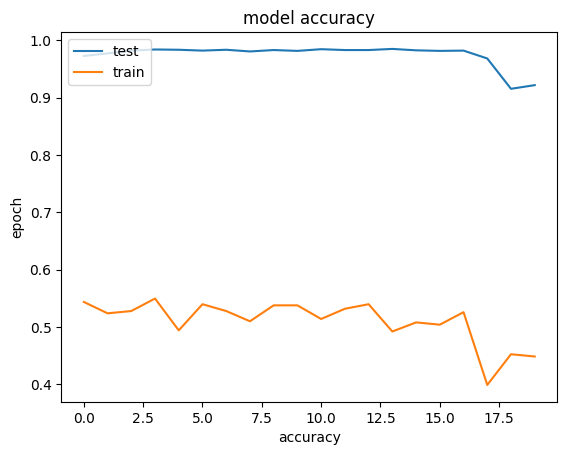

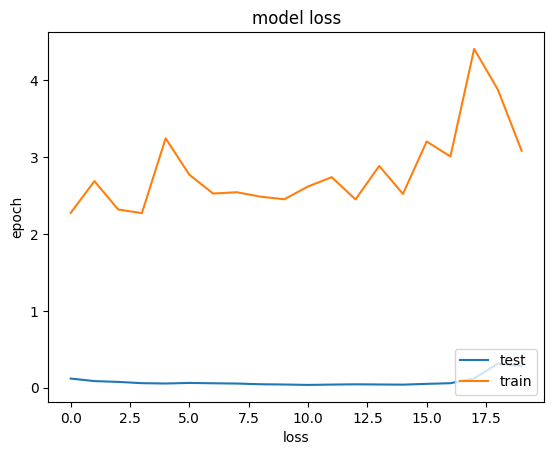

In [ ]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title("model accuracy")
plt.xlabel('accuracy')
plt.ylabel("epoch")
plt.legend(['test','train'],loc='upper left')
plt.show()

plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.xlabel('loss')
plt.ylabel('epoch')
plt.legend(['test','train'],loc='lower right')
plt.show()

In [ ]:
def loadimg(imgpath,target_size=(img_size,img_size)):
  img=Image.open(img_path)
  img=img.resize(target_size)
  img_array=np.array(img)
  img_array=img_array.astype('float32')/255
  return img_array

def Predict(model,img_path,class_indices):
    preprocessingimg=loadimg(img_path)
    preprocessingimg=np.expand_dims(preprocessingimg,axis=0)
    predict=model.predict(preprocessingimg)
    predictclassind=np.argmax(predict,axis=1)[0]
    predictclassname=class_indices[predictclassind]
    return predictclassname

In [ ]:
class_indices={v:k for k,v in train_gen.class_indices.items()}
json.dump(class_indices,open('class_indices.json','w'))

In [ ]:
class_indices

{0: '.config',
 1: '.ipynb_checkpoints',
 2: 'astra',
 3: 'breach',
 4: 'brim',
 5: 'chamber',
 6: 'clove',
 7: 'cypher',
 8: 'deadlock',
 9: 'gekko',
 10: 'harbor',
 11: 'iso',
 12: 'jett',
 13: 'killjoy',
 14: 'neon',
 15: 'omen',
 16: 'phoenix',
 17: 'raze',
 18: 'reyna',
 19: 'sage',
 20: 'skye',
 21: 'sova',
 22: 'tejo',
 23: 'viper',
 24: 'vyse',
 25: 'waylay',
 26: 'yoru'}

In [ ]:
img_path='/raze.webp'
preds=Predict(model,img_path,class_indices)
print(preds)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
raze
